In [46]:
import numpy as np
import scipy as sp
from scipy import linalg as lg
from scipy import integrate
from scipy.integrate import odeint
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
get_ipython().magic(u'matplotlib inline')

In [47]:
#Lanchester’s Combat models

In [48]:
#1.

b = [ 0.62757745  0.49113604  0.15756364]
n = [ 0.16940923  0.94375218  0.01268461]
e = [ 0.33881846  1.88750436  0.02536923]
a = [ 0.08470461  0.47187609  0.00634231]


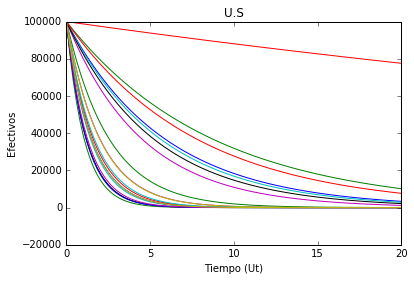

In [84]:
#Ecuacion diferencial asumiendo que Japon pierde con x = 1
#Los valores de n y b se consideran aleatorios

#Ecuacion
def L(ys,ts,b,n):
    
    #Ecuaciones
    dldt = np.zeros(len(ys))
    #dldt[0] = -a*ys[1] - e*ys[0]
    dldt[1] = -b - n*ys[1]
    
    return dldt

#Condiciones iniciales
ts = np.linspace(0,20,100)
y0 = [23000.0,100000.0]

#Almacenamiento de los b y n
bs = []
ns = []

#Calculo de los b y n
for i in xrange(0,20):
    #Generacion aleatoria de los b y n
    random.seed()
    b = random.random()
    n = random.random()
    
    #Solucion a la ecuacion diferencial con Odeint
    Sol = integrate.odeint(L,y0,ts,args=(b,n))
    
    #Condicion para que b y n permitan ganar en un rango de 2 a 20 Ut
    if Sol[:,1][i]>76700:
        bs.append(b)
        ns.append(n)
    
    #Grafico de la solucion
    plt.plot(ts,Sol[:,1])
    plt.title('U.S')
    plt.xlabel('Tiempo (Ut)')
    plt.ylabel('Efectivos')

bs = np.array(bs)
ns = np.array(ns)

print 'b =',bs
print 'n =',ns
print 'e =',2*ns
print 'a =',0.5*ns

In [ ]:
"""
En el grafico se muesta el comportamiento de la armada estadounidense
para diferentes valores de b y n cuando se supone que estos ganan 
(se supone que la armada japonesa pierde cuando queda con un solo efectivo)
Los valores de b y n se dan de manera aleatoria y para aquellos que hagan 
el numero de efectivos mayor a 76700 efectivos se clasifican para dar una
victoria entre 2 y 20 unidades de tiempo.
"""

In [70]:
#2.

In [23]:
#RK4
def RK4(f,y0,ts):
    
    #f es el conjunto de funciones acopladas y con argumentos de la forma f(t,y)
    #donde y es una lista de condiciones iniciales
    
    #Datos
    t0 = ts[0]
    t1 = ts[-1]
    
    h = abs(ts[1]-ts[0]) 
    N = abs(int( (t1-t0)/h ))
    
    X = []
    Y = []
    Z = []
    
    
    for i in xrange(0,len(y0)):
        for j in xrange(0,N):
            #Ks:
            k0 = f(t0         , y0[i:i+])
            k1 = f(t0 + 0.5*h , y0[i:i+2] + 0.5*k0*h)
            k2 = f(t0 + 0.5*h , y0[i:i+2] + 0.5*k1*h)
            k3 = f(t0 + h     , y0[i:i+2] + k2*h)
        
            #Solucion
            x1 = y0[0] + h*(k0 + 2*k1 + 2*k2 + k3)/6.0
            y1 = y0[1] + h*(k0 + 2*k1 + 2*k2 + k3)/6.0
            #z1 = y0[2] + h*(k0 + 2*k1 + 2*k2 + k3)/6.0
            
            #Almacenando valores
            X.append(x1)
            Y.append(y1)
            #Z.append(z1)
        
            #Renombrando y modificando t0 
            x0 = x1
            y0 = y1
            #z0 = z1
            t0 = t0 + j*h
        
    return [X,Y]

In [24]:
#3.

In [42]:
#Funciones a solucionar

#Coeficientes
b = 0.0028
a = 0.5*b
n = 0.07
e = 2*n

def L(ys,ts):
    
    #Ecuaciones
    dldt = np.zeros(len(ys))
    dldt[0] = -a*ys[1] - e*ys[0]
    dldt[1] = -b*ys[0] - n*ys[1]
    
    return dldt

ts = np.linspace(0,30,100)
y0 = [23000.0,100000.0]
Sol = integrate.odeint(L,y0,ts)

(2, 30)

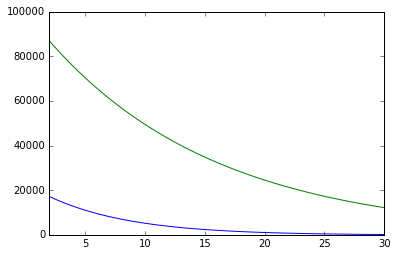

In [43]:
plt.plot(ts,Sol[:,0])
plt.plot(ts,Sol[:,1])

ext = 30 
plt.xlim(2,ext)

In [50]:
random.random()

0.5120241456770057